# GPU resources and Google Colab

Helfull computational resources that can be used for free to accelarate training of certain neural networks. Check out this nice list of [deep learning in cloud repository](https://github.com/zszazi/Deep-learning-in-cloud) tools for online resources and most of the support GPU's but not all are free. We are going to use [google colab](https://colab.research.google.com/?utm_source=scs-index) 

It is a jupyter notebook environment. Its easy to use and view the result but when code becomes more complicate sometimes a cloud environmnet would be nice to use with python scripts. So I encourage to explore that list that i mentioned and find what is suitable for you. Ultimately it is up to you what you want to use for your education activities/projects. But google colabl is relatively beginner friendly.

It is important in colab environmet to select GPU.

<code>**1)**</code> Navigate to runtine environment

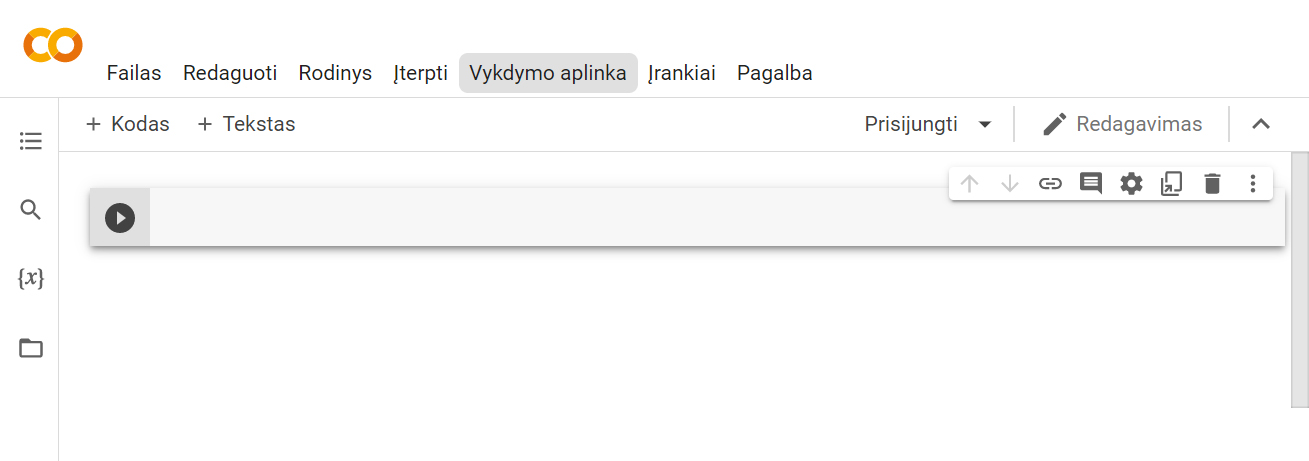

<code>**2**</code> Select GPU environment

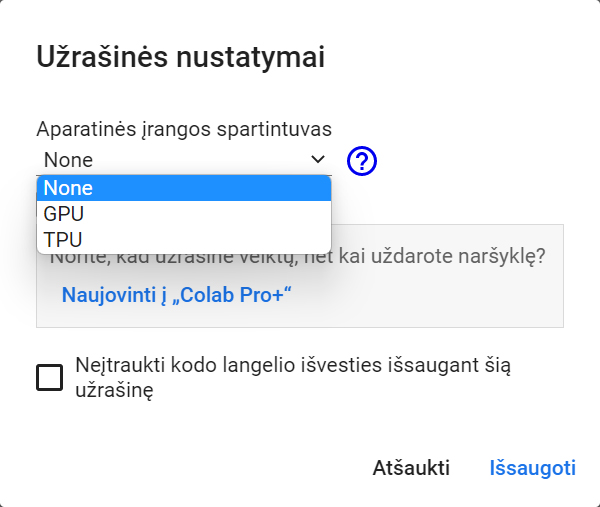

<code>**3**</code> check is PyTorch is available

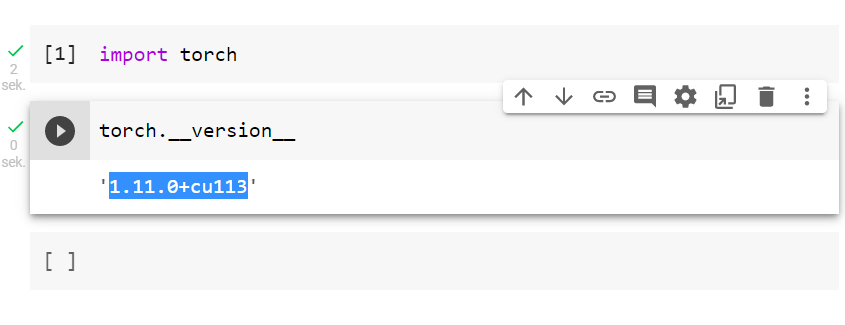

<code>**1.11.0+cu113**</code> load a 1.11 version which is the recent one. And also this <code>**cu113**</code> is google specific thing. Because usually this doesnt show up when we import torch on our computer. It means that this PyTorch version has cuda <code>**11.3**</code> support. And to make sure that indeed recognizes GPU run this command in colab notebook:

In [ ]:
torch.cuda.is_available()

We can open notebooks that are stored in our [course github repository](https://github.com/tavo-robotas/edu_deep_learning) directly in colab environment.

<code>**1**</code> Navigate to file > open notebook

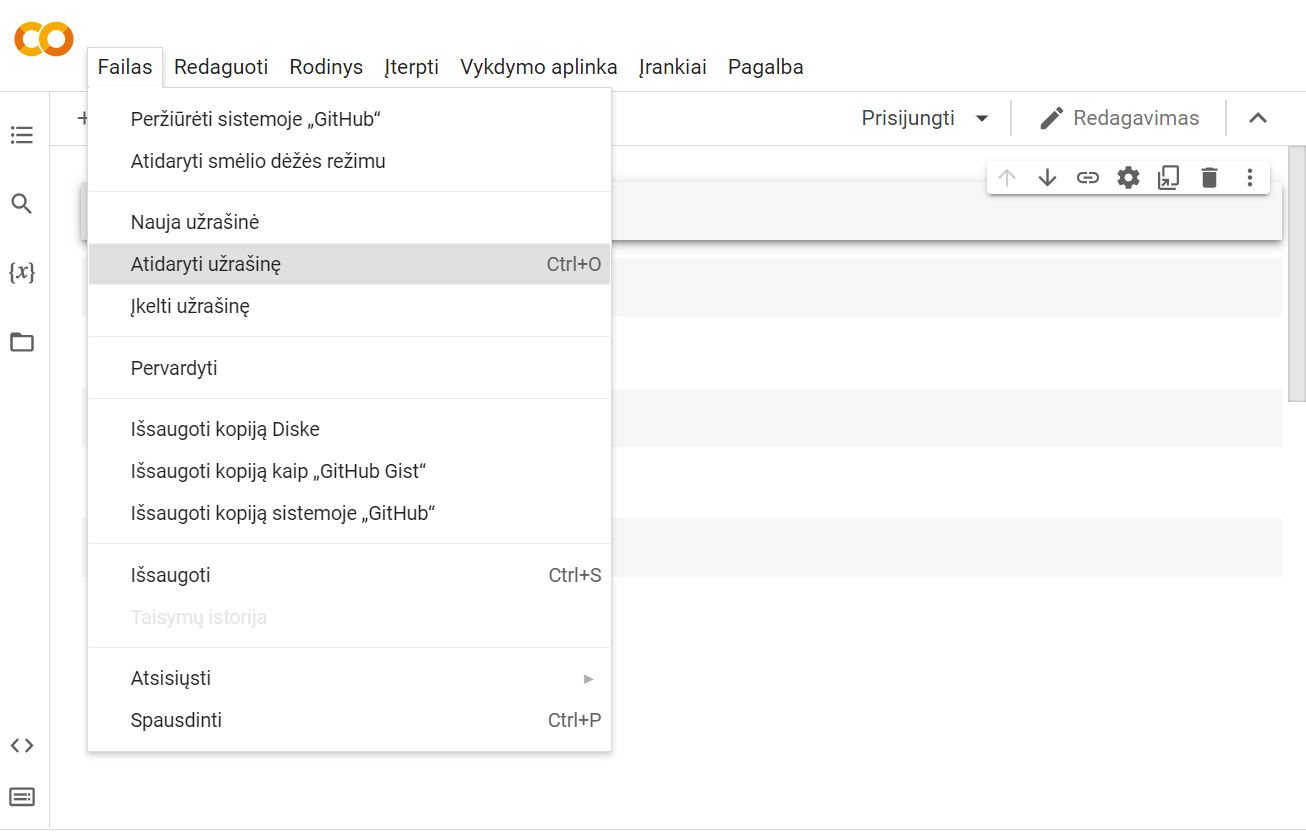

<code>**2**</code> Pick Github tab and copy paste specific .ipynb notebook file or entire repositry with notebook files and pick the one you want to load

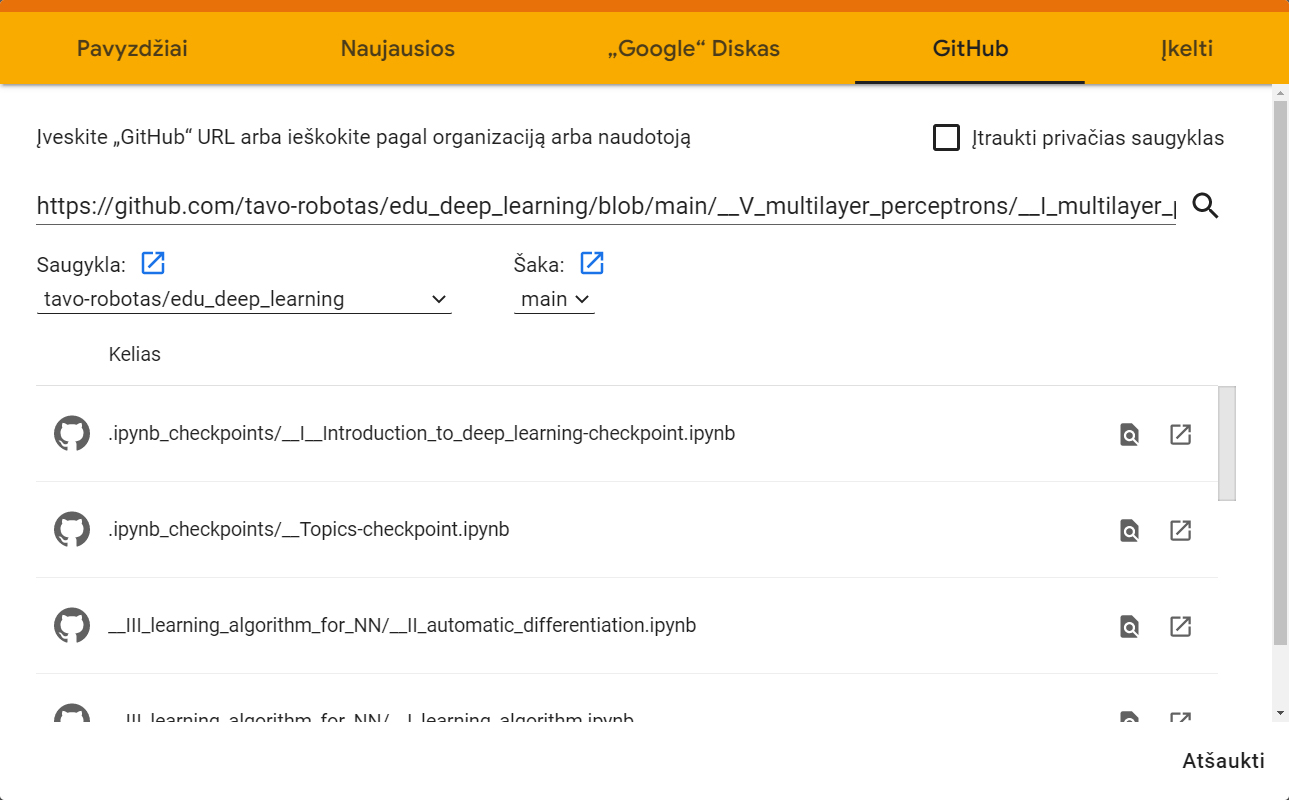

Lets one lets say <code>**__I_multilayer_perceptron_architecture**</code> from section <code>**__V_multilayer_perceptrons**</code>. By trying to execute code on this notebook you will see this warning message popup.

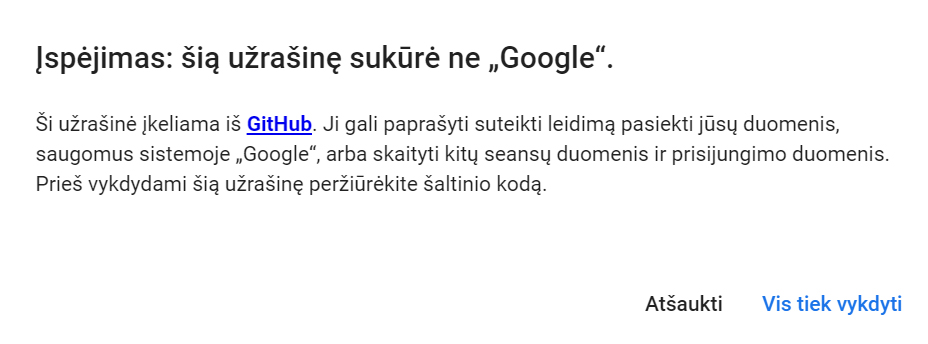

In case we would pick the <code>**__III_training_adaline.ipynb**</code> from section <code>**__III_learning_algorithm_for_NN**</code> and try to load our dataset we would get an erro like this